### class 상속

#### 상속

기존 클래스의 속성(변수), 메서드(함수)를 물려받아 새로운 하위 클래스를 생성하는 것.

**상속이 필요한 이유**

1. 코드 재사용

- 상속을 통해 기존 클래스의 속성과 메서드를 재사용할 수 있음

- 새로운 클래스를 작성할 때 기존 클래스의 기능을 그대로 활용할 수 있으며, 중복된 코드를 줄일 수 있음


2. 계층 구조

- 상속을 통해 클래스들 간의 계층 구조를 형성할 수 있음

- 부모 클래스와 자식 클래스 간의 관계를 표현하고, 더 구체적인 클래스를 만들 수 있음


3. 유지보수의 용이성

- 상속을 통해 기존 클래스의 수정이 필요한 경우, 해당 클래스만 수정하면 되므로 유지 보수가 용이해짐

- 코드의 일관성 유지, 수정이 필요한 범위를 최소화 할 수 있음


예시 설명

-클래스 하나로 학생, 교수의 정보 나타내기 어려움.

그러나 따로 작성하니 중복되는 부분 발생

--> 클래스 상속이 필요한 이유


**super()**

부모 클래스의 메서드를 호출하기 위해 사용되는 내장 함수

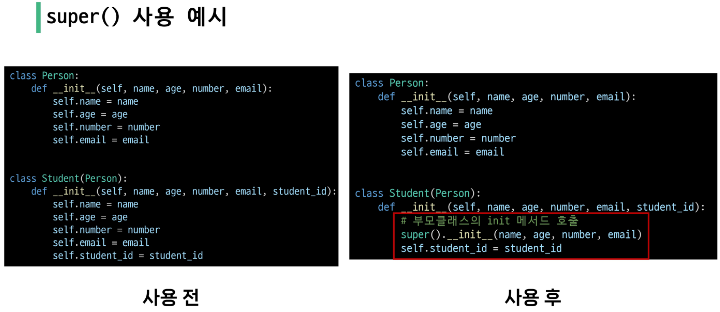

In [ ]:
class Person:
   def __init__(self, name, age):
        self.name = name
        self.age = age

   def talk(self):
       print(F"안녕, {self.name}입니다.")

class Professor(Person):
    def __init__(self, name, age, department):
        Person.__init__(self, name, age)
        self.department = department


class Student(Person):
    def __init__(self, name, age, gpa):
        super().__init__(name, age)
      #   self.name = name
      #   self.age = age
        self.gpa = gpa


p1 = Professor("김교수", 49, "컴공")
s1 = Student("김학생", 20, 3.5)

p1.talk()
s1.talk()

#하위클래스에 부모클래스의 이름을 넣으면 부모클래스의 이름이 바뀌었을 때 
#모든 하위클래스에서 수정을 해줘야한다는 불편 발생
#--> super() 이용

#### 다중 상속

- 두 개 이상의 클래스를 상속 받는 경우

- 상속받은 모든 클래스의 요소를 활용 가능함

- 중복된 속성이나 메서드가 있는 경우 상속 순서에 의해 결정됨

(부모의 속성명, 메서드가 겹칠 경우 상속을 받는 순서대로 찾아감.)

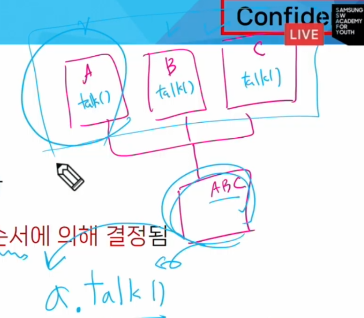

이 경우 제일 먼저 상속받은 A클래스의 talk() 메서드 이용.

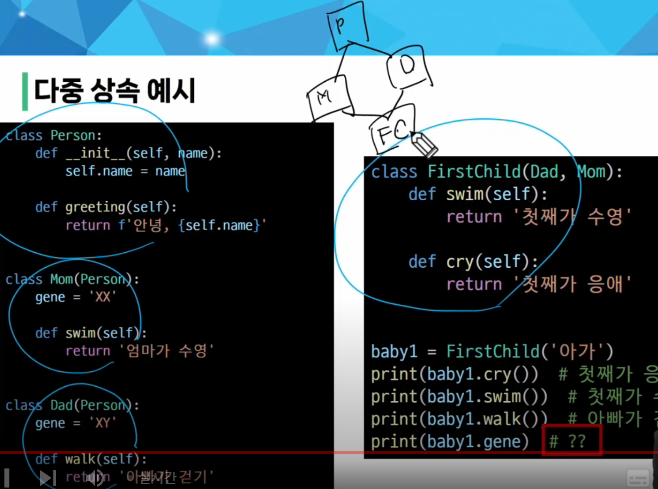

In [ ]:
class Person:
   gene = "XYZ"

   def __init__(self, name):
      self.name = name

   def greeting(self):
      return f"안녕, {self.name}"
   

class Mom(Person):
   gene = "XX"

   def __init__(self, name): #파이썬 스타일가이드에는 명시적으로 쓰는게 좋다함
      super().__init__(name)

   def swim(self):
      return "엄마가 수영"
   

class Dad(Person):
   gene = "XY"

   def __init__(self, name): #추가인자작성~
      super().__init__(name)
      # self.age = age #상속받는 클래스에 인자가 더 있는데 넣지 않는다면 error

   def walk(self):
      return "아빠가 걷기"


class FirstChild(Dad, Mom):
   mom_gene = Mom.gene # 상속 순서를 바꿀 수 없는 사정이 있을 때 굳이 후순위 클래스의 변수를 가져와야 할 때는
                     # 이렇게 정의해서 사용할 수 밖에 없다.
    
   def __init__(self, name):
      super().__init__(name)

   def swim(self):
      return "첫째가 수영"
    
   def cry(self):
      return "첫째가 응애"
    
baby1 = FirstChild("아가")
print(baby1.cry())
print(baby1.swim())
print(baby1.walk())
print(baby1.gene) # 먼저 상속한 Dad클래스의 클래스변수 상속받음.
print(baby1.mom_gene)

print(FirstChild.mro())



#### 상속 관련 함수와 메서드

**mro()**
- Method Resolution Order

- 해당 인스턴스의 클래스가 어떤 부모 클래스를 가지는지 확인하는 메서드

- 기존의 인스턴스 -> 클래스 순으로 이름 공간을 탐색하는 과정에서 
상속 관계에 있으면 인스턴스 -> 자식클래스 -> 부모클래스로 확장 

print(FirstChild.mro())

[<class '__main__.FirstChild'>, <class '__main__.Dad'>, <class '__main__.Mom'>, <class '__main__.Person'>, <class 'object'>] 


### 에러와 예외

#### 디버깅

**버그**

소프트웨어에서 발생하는 오류 또는 결함. 프로그램의 예상된 동작과 실제 동작 사이의 불일치

**디버깅**

소프트웨어에서 발생하는 버그를 찾아내고 수정하는 과정

프로그램의 오작동 원인을 식별하여 수정하는 작업

**디버깅 방법**

1. print() 함수 활용

  -특정 함수 결과, 반복/조건 결과 등 나눠서 생각, 코드를 bisection으로 나눠서 생각

2. 개발환경(text Editor, IDE) 등에서 제공하는 기능 활용

breakpoint, 변수 조회 등

3. Python tutor 활용(단순 파이썬 코드인 경우)

4. 뇌 컴파일, 눈 디버깅 등

#### 에러

프로그램 실행 중 발생하는 예외 상황

유형. 1. 문법 에러(Syntax Error) : 구문오류.
2.예외(Exception) : 프로그램 실행 중 감지되는 에러

#### 예외

예외 상황을 나타내는 예외 클래스들

-파이썬에서 이미 정의되어 있으며, 특정 예외 상황에 대한 처리를 위해 사용

ZeroDivisionError-나누기 연산의 두 번째 인자가 0일 때

NameError-지역, 전역변수를 찾을 수 없을 때

TypeError-타입 불일치, 인자 누락, 인자 초과, 인자 타입 불일치

ValueError-연산, 함수에 문제가 없지만 부적절한 값을 가진 인자를 받았고, 상황이 IndexError처럼 더 구체적인 
예외로 설명되지 않는 경우 발생

IndexError-시퀀스 인덱스가 범위를 벗어날 때

KeyError-딕셔너리에 해당 키 부재

ModuleNotFoundError-모듈을 찾을 수 없을 때 발생

ImportError-임포트 하려는 이름을 찾을 수 없을 때 발생(모듈은 찾았는데 import 하려는걸 못찾음)

KeyboardInterrupt-사용자가 cntl+c or del을 눌렀을 때 발생--???

IndentationError-잘못된 들여쓰기와 관련된 문법 오류

### 예외처리

#### try except

try 블록 안에는 예외가 발생할 수 있는 코드 작성

except 블록 안에는 예외가 발생했을 때 처리할 코드 작성

예외 발생 시 try를 빠져나와 except 블록으로 이동

복수 예외 처리 가능.


In [6]:
try:
    num = int(input("100으로 나눌 값을 입력>> "))
    print(100 / num)

except ValueError:
    print("숫자가 뭔지 모르시나요?")
except ZeroDivisionError:
    print("학교 열심히 안다녔구나..")
except:
    print("에러발생")
    
# 여기서 실행하면 안됨 무한루프에 빠집니다
# except는 작성 순서대로 찾아가는 문제가 있음.
# 한번에 여러 에러를 작성할 수도 있음.


숫자가 뭔지 모르시나요?


In [ ]:
try:
    num = int(input("100으로 나눌 값을 입력>> "))
    print(100 / num)

except BaseException:
    print("숫자가 뭔지 모르시나요?")
except ZeroDivisionError:
    print("학교 열심히 안다녔구나..") # 하위클래스라서 죽어버렸음
except:
    print("에러발생")

# 에러는 클래스로 존재. 클래스들 간에 상속 존재(계층구조 존재).
# 만약 ValueError 클래스를 ZeroDivisionError 클래스가 상속하고 있다면 ValueError 에러가 먼저 잡힘
# --> 하위 클래스부터 except 작성.



### EAFP & LBYL

#### Easier to ASk for Forgiveness than Permission

예외처리를 중심으로 코드를 작성하는 접근 방식 (try except)

#### Look Before You Leap

값 검사를 중심으로 코드를 작성하는 접근 방식 (if-else)

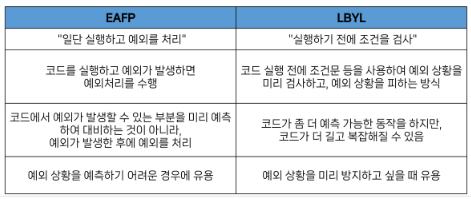



#### as 키워드

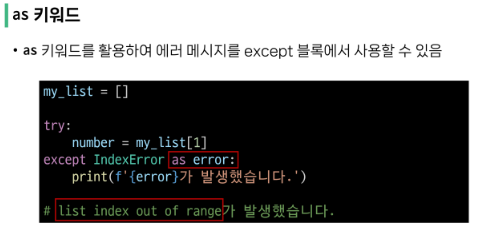

as로 에러메시지를 제공받을 수 있음


### 객체지향의 핵심 개념 (OOP)

- 추상화(Abstarction)

- 상속(Inheritance)

- 다형성(Polymorphism)

- 캡슐화(Encapshilation)

#### 추상화

세부적인 내용은 감추고 필요한 부분만 표현하는 것

#### 상속

부모-자식 관계 성립. 코드의 재사용성을 위해 이용.

부모클래스에서 정의한 기능을 자식클래스에서 다시 정의하지 않고도 사용할 수 있다.

In [13]:
class Person:
    life_is = "egg"
    def __init__(self, name):
        self.name = name

    def greeting(self):
        return f"Hello, {self.name}!"

class Student(Person):
    def __init__(self, name):
        super().__init__(name)

s1 = Student("Yubin")
s1.greeting()
print(s1.life_is)



egg


#### 다형성

여러 모양. 동일한 메서드가 클래스에 따라 다르게 행동할 수 있다.
서로 다른 클래스에 속해있는 객체들이 동일한 메시지에 대해 각기 다른 방식으로 응답(동작)


In [15]:
class Person:
    def __init__(self, name):
        self.name = name
    
    
    def talk(self):
        print(f"안녕하세요 저는 {self.name}입니당")

    
class Soldier(Person):
    def __init__(self, name, army): #여기서 인자 받기
        super().__init__(name) # 부모클래스의 인자니까 건드리지x
        self.army = army

    def talk(self): #오버라이딩
        print(f"충성! 저는 {self.army}소속의 {self.name}입니다")


p1 = Person("A")
s1 = Soldier("B", "21사단")

p1.talk()
s1.talk()

안녕하세요 저는 A입니당
충성! 저는 21사단소속의 B입니다


**메서드 오버라이딩**

- 상속받은 메서드를 그대로 사용하는게 아니라 자신의 메서드로 재정의 하는 것.


#### 캡슐화

객체의 일부 구현 내용에 대해 외부로부터의 직접적인 접근을 차단한다.

In [20]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.__age = age
    
    def get_age(self):
        return self.__age
    
    
    def set_age(self, age):
        if type(age) == str:
            print("나이가 잘못되었다")
            return
        self.__age = age
    

p1 = Person("Yubin", 26)

print(p1.name)
# print(p1.age) #분명 인자를 등록했는데 없다는 에러
# __age는 클래스 외부에서 사용 불가.
# 이 경우 클래스 내부에서 함수를 만들어 사용하게됨

print(p1.get_age()) #변경되지 말아야 할 정보를 안전하게 가져다 쓰는 방법.
#변경 불가능한건 아니고 method를 통해 변경가능하도록 바꿀 수 있음

p1.set_age(25)
print(p1.get_age())


Yubin
26
25
